<a href="https://colab.research.google.com/github/rikachan19/JaringanSarafTiruan/blob/main/tugas2/tugasjst2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Set random seed for reproducibility
np.random.seed (42)
tf.random.set_seed (42)


In [ ]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype ("float32") / 255.0
test_images = test_images.astype ("float32") / 255.0
train_labels = to_categorical (train_labels, 10)
test_labels = to_categorical (test_labels, 10)

In [ ]:
# Define a function to create and compile a CNN model
def create_model(activation_function):
  model = models.Sequential ([
  layers.Conv2D (32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
  layers.MaxPooling2D ( (2, 2)),
  layers.Conv2D (64, (3, 3), activation=activation_function),
  layers.MaxPooling2D ( (2, 2)),
  layers.Conv2D (64, (3, 3), activation=activation_function),
  layers.Flatten (),
  layers.Dense (64, activation=activation_function),
  layers.Dense (10, activation='softmax') # Softmax for output layer
])
  model.compile(optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
  return model

In [ ]:
# List of activation functions to compare
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

In [ ]:
# Train and evaluate models with different activation functions
for activation in activation_functions:
  print (f"\nTraining model with {activation} activation...")
if activation == 'leaky_relu':
  model = models.Sequential ([
  layers.Conv2D (32, (3, 3), input_shape=(32, 32, 3)),
  layers.Activation (tf.keras.layers. LeakyReLU (alpha=0.1)),
  layers.MaxPooling2D ( (2, 2)),
  layers.Conv2D (64, (3, 3)),
  layers.Activation (tf.keras.layers. LeakyReLU (alpha=0.1)),
  layers.MaxPooling2D ((2, 2)),
  layers.Conv2D (64, (3, 3)),
  layers.Activation (tf.keras.layers. LeakyReLU (alpha=0.1)), layers. Flatten (),
  layers. Dense (64),
  layers.Activation (tf.keras.layers.LeakyReLU (alpha=0.1)),
  layers. Dense (10, activation='softmax')
])
  model.compile (optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])
else:
  model = create_model (activation)

history = model.fit (train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)


Training model with linear activation...

Training model with sigmoid activation...

Training model with tanh activation...

Training model with relu activation...

Training model with leaky_relu activation...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 50s - 80ms/step - accuracy: 0.4400 - loss: 1.5404 - val_accuracy: 0.5549 - val_loss: 1.2571
Epoch 2/10
625/625 - 83s - 132ms/step - accuracy: 0.5915 - loss: 1.1525 - val_accuracy: 0.6270 - val_loss: 1.0640
Epoch 3/10
625/625 - 84s - 134ms/step - accuracy: 0.6541 - loss: 0.9810 - val_accuracy: 0.6671 - val_loss: 0.9636
Epoch 4/10
625/625 - 79s - 127ms/step - accuracy: 0.6956 - loss: 0.8684 - val_accuracy: 0.6833 - val_loss: 0.9116
Epoch 5/10
625/625 - 81s - 129ms/step - accuracy: 0.7287 - loss: 0.7807 - val_accuracy: 0.6943 - val_loss: 0.8953
Epoch 6/10
625/625 - 49s - 79ms/step - accuracy: 0.7542 - loss: 0.7075 - val_accuracy: 0.7011 - val_loss: 0.8947
Epoch 7/10
625/625 - 82s - 132ms/step - accuracy: 0.7745 - loss: 0.6507 - val_accuracy: 0.6954 - val_loss: 0.9493
Epoch 8/10
625/625 - 49s - 79ms/step - accuracy: 0.7944 - loss: 0.5960 - val_accuracy: 0.6922 - val_loss: 0.9702
Epoch 9/10
625/625 - 81s - 129ms/step - accuracy: 0.8099 - loss: 0.5473 - val_accuracy: 0.6

In [ ]:
# Store history, loss, accuracy, and confusion matrix y_pred model.predict (test_images)
y_pred = model.predict(test_images)
y_pred_classes = np.argmax (y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
results[activation] = (history, test_loss, test_acc, conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [ ]:
# Plot the results for accuracy and loss
plt.figure (figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

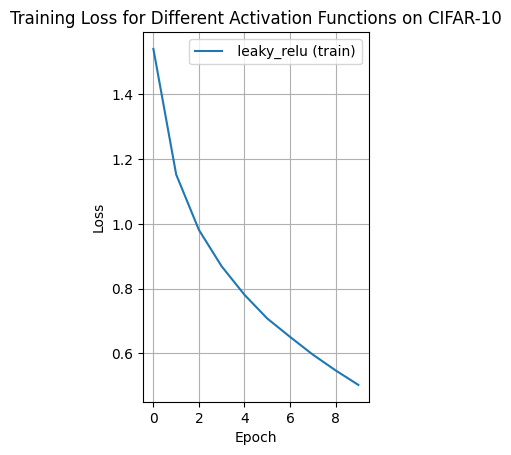

In [ ]:
# Plot training loss
plt.subplot(1, 2, 2)
for activation, (history, _, _, _) in results.items():
  plt.plot (history.history['loss'], label=f' {activation} (train)')
  plt.title('Training Loss for Different Activation Functions on CIFAR-10')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid (True)
  plt.show()


Test accuracy with leaky_relu: 0.6850


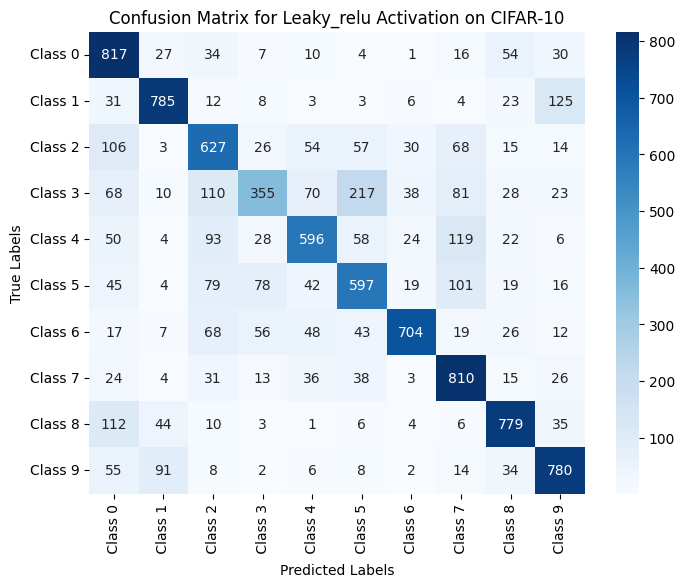

In [ ]:
# Display confusion matrix for each activation function
for activation, (_, _, test_acc, conf_matrix) in results.items():
  print (f'\nTest accuracy with {activation}: {test_acc:.4f}')
  plt.figure(figsize=(8, 6))
  sns.heatmap (conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[f' Class {i}' for i in range (10)],
  yticklabels=[f'Class {i}' for i in range (10) ])
  plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()